In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from Python_code import examples as eg
import numpy as np
from numpy import *
import dionysus

The circular coordinates pipeline for examining different smoothness cost-functions:

    Step 1. Getting the point cloud
    Step 2. Computing the Vietoris-Rips filtration and its cohomology
    Step 3. Selecting the Cocycle
    Step 4. First smoothing using Least Squares (Optional)
    Step 5. Second smoothing using a new cost function

## Perform PCA (with different components) and compute the bottleneck distance between the PCA+CC persistent diagrams and the CC persistent diagrams above.

[[0.00959167 0.01578424]
 [0.0403835  0.88809462]
 [0.5343289  0.91593968]
 [0.79278829 0.767143  ]
 [0.14723425 0.86615402]
 [0.9827407  0.68938183]
 [0.3240732  0.43063514]
 [0.69878164 0.98082206]
 [0.06382641 0.43964234]
 [0.70502871 0.53903674]
 [0.15365679 0.87752065]
 [0.44254694 0.34928965]
 [0.5454326  0.62985938]
 [0.69180066 0.22731589]
 [0.16883564 0.86190797]
 [0.66929519 0.92685942]
 [0.4295555  0.1777819 ]
 [0.21206289 0.34992811]
 [0.72860109 0.0572773 ]
 [0.95267099 0.21875084]
 [0.50496816 0.21864172]
 [0.26984492 0.39709587]
 [0.56622502 0.03872606]
 [0.98642522 0.73919594]
 [0.21133599 0.85902912]
 [0.76870931 0.67846108]
 [0.33053333 0.20677062]
 [0.28164518 0.56044074]
 [0.69547695 0.16013022]
 [0.36918864 0.79910231]
 [0.15385452 0.60732317]
 [0.59758351 0.77896853]
 [0.94641079 0.42169275]
 [0.21294816 0.91113619]
 [0.35662671 0.13133426]
 [0.26720859 0.06413228]
 [0.13028308 0.83520055]
 [0.3020231  0.29006105]
 [0.48285958 0.10894068]
 [0.56244145 0.33872041]


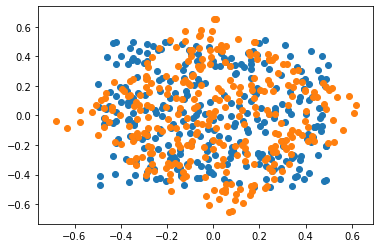

In [3]:
import numpy as np
from Python_code import PCAtool as PCAtool
X=np.random.rand(300,2)
print(X)
X_new=PCAtool.pca(X,K=2)
import matplotlib.pyplot as plt
X_cen=X-np.mean(X,axis=0)
plt.scatter(X_cen[:,0], X_cen[:,1])
plt.scatter(X_new[:,0], X_new[:,1])
plt.show()

In [4]:
#Let us compute the bottle-neck distance between full dataset and k-PCA dataset. k denotes the number of principal components.
prime=23
D=20
dat1=np.random.rand(150,D)
mean=np.repeat(0,D)
cov=np.identity(D)
dat1=np.random.multivariate_normal(mean, cov, 150)
vr = dionysus.fill_rips(dat1, 2, 10.) #Vietoris-Rips complex
cp = dionysus.cohomology_persistence(vr, prime, True) #Create the persistent cohomology
dgms = dionysus.init_diagrams(cp, vr) #Calculate the persistent diagram using the designated coefficient field.
#record for plottings..
A=np.array([0,1,1])


for k in range(D):
    dat_k = PCAtool.pca(dat1,K=k+1)
    vr_k = dionysus.fill_rips(dat_k, 2, 10.) #Vietoris-Rips complex
    cp_k = dionysus.cohomology_persistence(vr_k, prime, True) #Create the persistent cohomology
    dgms_k = dionysus.init_diagrams(cp_k, vr_k) #Calculate the persistent diagram using the designated coefficient field.
    bdist_0 = dionysus.bottleneck_distance(dgms[0], dgms_k[0])
    bdist_1 = dionysus.bottleneck_distance(dgms[1], dgms_k[1])
    #dionysus.plot.plot_diagram(dgms_k[1], show=True) 
    newrow=[k+1,bdist_0,bdist_1]
    #print(newrow)
    A = numpy.vstack([A, newrow])

print(A)
print(A[1,2])

#fig.figure(figsize=(5,5), dpi=100)
fig, ax = plt.subplots()
ax.plot(A[:,0],A[:,1],c='b')#dimension 0 diagram distance
ax.plot(A[:,0],A[:,2],c='r')#dimension 1 diagram distance
ax.set(xlabel='# of principal components (k)', ylabel='Bottleneck distance',
       title='Bottleneck distance between full sample diagram and k-PCA sample diagrams')

KeyboardInterrupt: 

In [ ]:
type(dgms)
type(dgms[0])
#From diagrams to arrays
#np.array(dgms[0])
#From arrays to diagrams
#print( type([(0,1),(0.5,0.7)]) )
dionysus._dionysus.Diagram([(0,1),(0.5,0.7)])

In [ ]:
def denoise_dgm(dgms,threshold=0.1):
    threshold = .1
    bars_0 = [np.array(bar).tolist() for bar in dgms[0] if bar.death-bar.birth > threshold] #choosing cocycle that persist at least threshold=1.
    bars_1 = [np.array(bar).tolist() for bar in dgms[1] if bar.death-bar.birth > threshold] #choosing cocycle that persist at least threshold=1.
    #cocycles = [cp.cocycle(bar.data) for bar in bars]
    #plt is the matplotlib incarnation.
    #print( type(bars_1) )
    #bars_1=np.array(bars_1)
    #print(type(bars_1[1]))
    #print(bars_1[1])
    #print(type(bars_1))

    dgm_denoise_0=bars_0
    dgm_denoise_1=bars_1
    #print(type(dgm_denoise_0))
    #dionysus.plot.plot_diagram(dgm_denoise_0, show=False)
    #dionysus.plot.plot_diagram(dgm_denoise_1, show=False)
    return([dgm_denoise_0,dgm_denoise_1])

'''
#Red highlight cocyles that persist more than threshold value on barcode, when more than one cocyles have persisted over threshold values, this plots the first one.
dionysus.plot.plot_bars(dgms[1], show=False)
plt.plot([[bar.birth,bar.death] for bar in dgms[1] if bar.death-bar.birth > threshold][0],[[x,x] for x,bar in enumerate(dgms[1]) if bar.death-bar.birth > threshold][0],'r')
plt.title('Showing the selected cycles on bar codes (red bars)')
plt.show()

#Red highlight ***ALL*** cocyles that persist more than threshold value on diagram.
dionysus.plot.plot_diagram(dgms[1], show=False)
Lt1 = [[point.birth,point.death] for point in dgms[1] if point.death-point.birth > threshold] 
for Lt3 in Lt1:
    #print(Lt3)
    plt.plot(Lt3[0],Lt3[1],'ro')
plt.title('Showing the selected cycles on diagram (red points)')
plt.show()
'''
print(dgms_k)
test1=denoise_dgm(dgms_k)
test1[0]


In [ ]:
'''
#This is legacy code used to construct a dionysus.plot.plot_diagram object from raw, it is necessary to compute bottleneck distance.
dgms_tmp=denoise_dgm(dgms_k,0.1)
dgms_base_0=dionysus._dionysus.Diagram()
dgms_base_1=dionysus._dionysus.Diagram()
#pybind issue, need to be correct instead of succint.
for itr in range(len(dgms_tmp[0])):
    dgms_base_0.append(dgms_tmp[0][itr])
for itr in range(len(dgms_tmp[1])):
    dgms_base_1.append(dgms_tmp[1][itr])
print(type(dgms_base[0]))
dionysus.bottleneck_distance(dgms_base_0, dgms_base_1)
'''

In [5]:
#Let us compute the bottle-neck distance between full dataset and k-PCA dataset. k denotes the number of principal components.
prime=23
D=20
#Here is the data insertion part
dat1=np.random.rand(500,D)
vr = dionysus.fill_rips(dat1, 2, 2.) #Vietoris-Rips complex
cp = dionysus.cohomology_persistence(vr, prime, True) #Create the persistent cohomology
dgms = dionysus.init_diagrams(cp, vr) #Calculate the persistent diagram using the designated coefficient field.
#record for plottings..
A=np.array([0,0,1,1])

for thres in [0,0.1]:
    #######Thresholding the features on the persistent diagrams describing persistent cohomology of VR complex(CC)
    dgms_tmp=denoise_dgm(dgms,thres)#thresholding CC diagrams
    dgms_base_0=dionysus._dionysus.Diagram()#take persistent points of dim 0
    dgms_base_1=dionysus._dionysus.Diagram()#take persistent points of dim 1
    #pybind issue, need to be correct instead of succint.
    for itr in range(len(dgms_tmp[0])):
        dgms_base_0.append(dgms_tmp[0][itr])
    for itr in range(len(dgms_tmp[1])):
        dgms_base_1.append(dgms_tmp[1][itr])
    #print(type(dgms_base[0]))
    #dionysus.bottleneck_distance(dgms_base_0, dgms_base_1)
    #######
    for k in range(D):
        dat_k = PCAtool.pca(dat1,K=k+1)
        vr_k = dionysus.fill_rips(dat_k, 2, 4.) #Vietoris-Rips complex
        cp_k = dionysus.cohomology_persistence(vr_k, prime, True) #Create the persistent cohomology
        dgms_k = dionysus.init_diagrams(cp_k, vr_k) #Calculate the persistent diagram using the designated coefficient field.
        #######Thresholding the features on the persistent diagrams describing persistent cohomology of kPCA-VR complex(kPCA)
        #############Here we use the same thresholding for fairness. But this configuration is easy to change.
        PCA_thres=thres
        #############
        dgms_k_tmp=denoise_dgm(dgms_k,PCA_thres)#thresholding CC diagrams
        dgms_k_0=dionysus._dionysus.Diagram()#take persistent points of dim 0
        dgms_k_1=dionysus._dionysus.Diagram()#take persistent points of dim 1
        #pybind issue, need to be correct instead of succint.
        for itr in range(len(dgms_k_tmp[0])):
            dgms_k_0.append(dgms_k_tmp[0][itr])
        for itr in range(len(dgms_k_tmp[1])):
            dgms_k_1.append(dgms_k_tmp[1][itr])
        #print(type(dgms_base[0]))
        #dionysus.bottleneck_distance(dgms_base_0, dgms_base_1)
        #######
        bdist_0 = dionysus.bottleneck_distance(dgms_base_0, dgms_k_0)
        bdist_1 = dionysus.bottleneck_distance(dgms_base_1, dgms_k_1)
        #dionysus.plot.plot_diagram(dgms_k[1], show=True) 
        newrow=[k+1,thres, bdist_0,bdist_1]
        #print(newrow)
        A = numpy.vstack([A, newrow])
print(A)
#Column names of A
#1 number of principal components k; 
#2 threshold used for filtering out topological features by persistence;
#3 Bottleneck distance between dimension 0 diagrams of CC and PCA
#3 Bottleneck distance between dimension 1 diagrams of CC and PCA

NameError: name 'denoise_dgm' is not defined